## Predicting Green Taxi Fares and Total Amounts PART THREE - FINAL - GRADIENT BOOSTING

# Gradient Boosting

## Data preparation

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading data
data = pd.read_csv('cleaned_project_data_20.csv')
data

,lpep_pickup_datetime,lpep_dropoff_datetime,PULocationID,DOLocationID,trip_distance,fare_amount,total_amount,trip_duration,night,peak_hour,congestion,amount_without_tip
0,2020-01-01 00:45:58,2020-01-01 00:56:39,66,65,1.28,20.0,24.36,641.0,1,0,0,20.30
1,2020-01-01 00:41:38,2020-01-01 00:52:49,181,228,2.47,10.5,15.34,671.0,1,0,0,11.80
2,2020-01-01 00:52:46,2020-01-01 01:14:21,129,263,6.30,21.0,25.05,1295.0,1,0,1,25.05
3,2020-01-01 00:19:57,2020-01-01 00:30:56,210,150,2.30,10.0,11.30,659.0,1,0,0,11.30
4,2020-01-01 00:52:33,2020-01-01 01:09:54,35,39,3.00,13.5,14.80,1041.0,1,0,0,14.80
...,...,...,...,...,...,...,...,...,...,...,...,...
1128350,2020-12-31 23:08:35,2020-12-31 23:13:00,41,74,0.79,5.0,6.30,265.0,1,0,0,6.30
1128351,2020-12-31 23:11:04,2020-12-31 23:20:08,41,116,2.31,12.0,12.30,544.0,1,0,0,12.30
1128352,2020-12-31 23:24:33,2020-12-31 23:40:24,116,119,5.73,20.0,20.30,951.0,1,0,0,20.30
1128353,2020-12-31 23:13:59,2020-12-31 23:16:20,42,42,0.31,3.5,4.80,141.0,1,0,0,4.80


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128355 entries, 0 to 1128354
Data columns (total 12 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   lpep_pickup_datetime   1128355 non-null  object 
 1   lpep_dropoff_datetime  1128355 non-null  object 
 2   PULocationID           1128355 non-null  int64  
 3   DOLocationID           1128355 non-null  int64  
 4   trip_distance          1128355 non-null  float64
 5   fare_amount            1128355 non-null  float64
 6   total_amount           1128355 non-null  float64
 7   trip_duration          1128355 non-null  float64
 8   night                  1128355 non-null  int64  
 9   peak_hour              1128355 non-null  int64  
 10  congestion             1128355 non-null  int64  
 11  amount_without_tip     1128355 non-null  float64
dtypes: float64(5), int64(5), object(2)
memory usage: 103.3+ MB


### Preparing Data

In [26]:
X = data[[
            'PULocationID',
            'DOLocationID',
            'trip_distance',
            'trip_duration',
            'night',
            'peak_hour',
            'congestion',
]]
# y = sample['fare_amount']
# y = sample['total_amount']
y = data['amount_without_tip']

print(X.shape)
print(y.shape)

(1128355, 7)
(1128355,)


In [27]:
# Split data
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=22)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=22)

In [28]:
# Scale data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

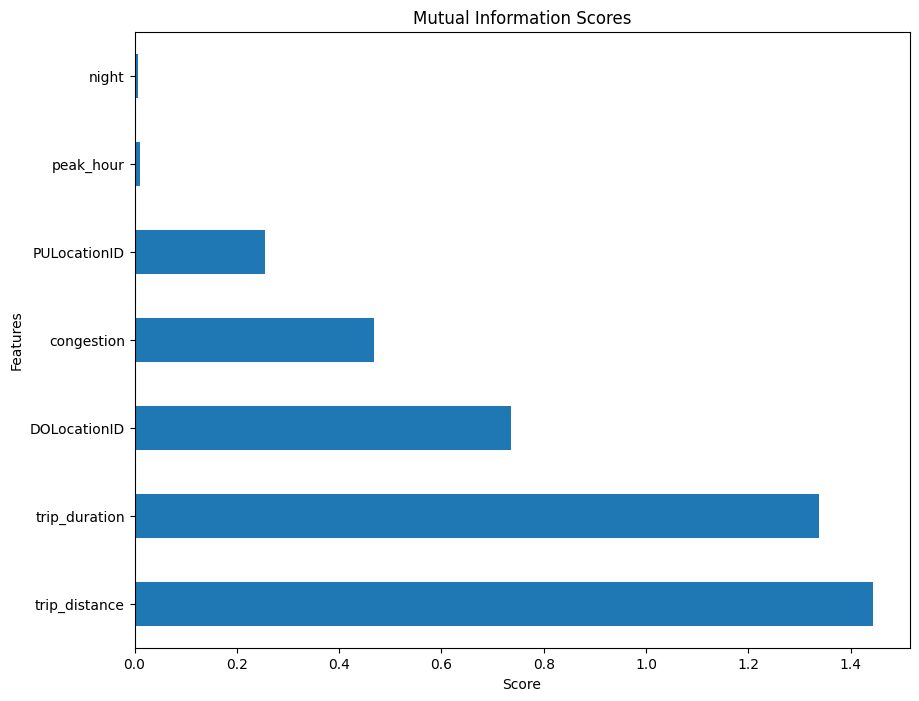

In [29]:
from sklearn.feature_selection import mutual_info_regression

# Calculate the mutual information
mutual_info = mutual_info_regression(X_train, y_train)
mutual_info_scores = pd.Series(mutual_info, index=X.columns)

# Sort the scores
sorted_mi_scores = mutual_info_scores.sort_values(ascending=False)

# Plot the scores
plt.figure(figsize=(10, 8))
sorted_mi_scores.plot(kind='barh')
plt.title('Mutual Information Scores')
plt.xlabel('Score')
plt.ylabel('Features')

plt.show()

In [30]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import GradientBoostingRegressor

# model = GradientBoostingRegressor(random_state=22)

# param_grid = {
#     'n_estimators': [300, 400, 500], 
#     'learning_rate': [0.3, 0.4, 0.5],
#     'max_depth': [6, 7, 8],
#     'min_samples_split': [8, 10],
#     'min_samples_leaf': [4, 6],
# }

# grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# grid_search.fit(X_train, y_train)

# print("Best parameters:", grid_search.best_params_)
# print("Best score:", grid_search.best_score_)
# # Best parameters: {'learning_rate': 0.2, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 300}
# # Best score: -5.090554628963088

In [31]:
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint as sp_randint

# model = GradientBoostingRegressor(random_state=22)

# param_dist = {
#     'n_estimators': sp_randint(100, 400),
#     'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
#     'max_depth': sp_randint(3, 6),
#     'min_samples_split': sp_randint(2, 11),
#     'min_samples_leaf': sp_randint(1, 11),
# }

# # Running for 10 iterations with 5-fold cross-validation
# random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=22)
# random_search.fit(X_train, y_train)

# print("Best parameters:", random_search.best_params_)
# print("Best score:", random_search.best_score_)

# # Best parameters: {'learning_rate': 0.2, 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 256}
# # Best score: -5.191879187064721

### Create Model

In [32]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the GradientBoostingRegressor model with hyperparameters
model = GradientBoostingRegressor(
    n_estimators=300,  # The number of boosting stages to be run.
    learning_rate=0.2,  # Shrinks the contribution of each tree by learning_rate.
    max_depth=4,  # Maximum depth of the individual regression estimators.
    min_samples_split=10,  # The minimum number of samples required to split an internal node.
    min_samples_leaf=10,  # The minimum number of samples required to be at a leaf node.
    loss='huber',  # Using the Huber loss function for robustness to outliers.
    alpha=0.95,  # The alpha quantile of the Huber loss function (5% outliers).
    random_state=22 
)

### Train model

In [33]:
# Fit the model on the training data
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.95, learning_rate=0.2, loss='huber',
                          max_depth=4, min_samples_leaf=10,
                          min_samples_split=10, n_estimators=300,
                          random_state=22)

### Validate model

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Make predictions on the validation set
y_val_pred = model.predict(X_val)

# Calculate and print the metrics for the validation set
mse_val = mean_squared_error(y_val, y_val_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
rmse_val = np.sqrt(mse_val)

print(f'Mean Absolute Error on validation set: {mae_val}')
print(f'Mean Squared Error on validation set: {mse_val}')
print(f'Root Mean Squared Error on validation set: {rmse_val}')

Mean Absolute Error on validation set: 0.6157584362910954
Mean Squared Error on validation set: 5.140253638003475
Root Mean Squared Error on validation set: 2.267212746524568


### Test model

In [35]:
# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate and print the metrics for the test set
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

print(f'Mean Absolute Error on test set: {mae_test}')
print(f'Mean Squared Error on test set: {mse_test}')
print(f'Root Mean Squared Error on test set: {rmse_test}')

Mean Absolute Error on test set: 0.6159921031488591
Mean Squared Error on test set: 5.923101434776372
Root Mean Squared Error on test set: 2.4337422695873885


### Visualise results

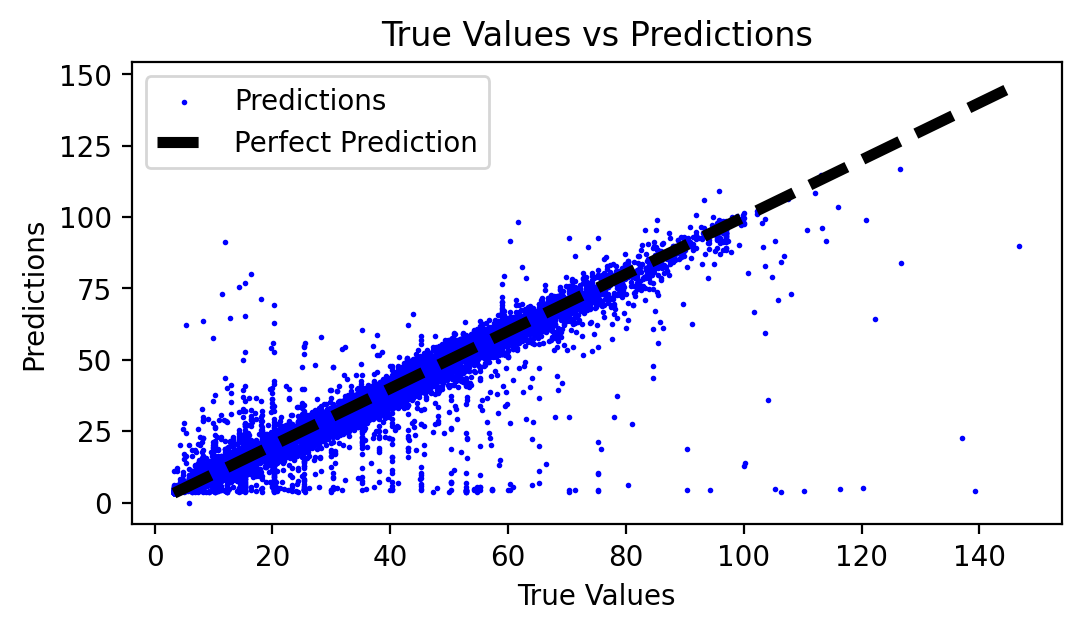

In [44]:
# Scatter Plot with Regression Line
plt.figure(figsize=(6, 3), dpi=200)
plt.scatter(y_test, y_test_pred, color='blue', label='Predictions', s=1)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=4, label='Perfect Prediction')

plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')
plt.legend()
plt.show()

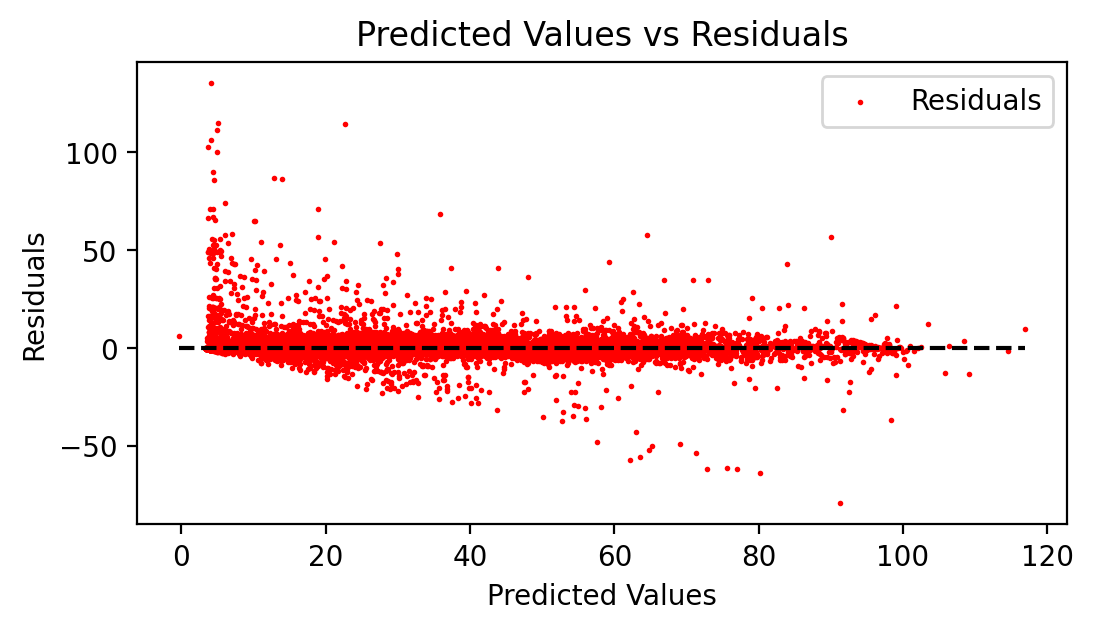

In [45]:
# Residual Plot
residuals = y_test - y_test_pred

plt.figure(figsize=(6, 3), dpi=200)
plt.scatter(y_test_pred, residuals, color='red', label='Residuals', s=1)
plt.hlines(y=0, xmin=min(y_test_pred), xmax=max(y_test_pred), colors='black', linestyles='dashed')

plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Predicted Values vs Residuals')
plt.legend()
plt.show()


# Gradient Boosting - Hot Encoding

## Data preparation

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading data
data = pd.read_csv('cleaned_project_data_20.csv')
data

,lpep_pickup_datetime,lpep_dropoff_datetime,PULocationID,DOLocationID,trip_distance,fare_amount,total_amount,trip_duration,night,peak_hour,congestion,amount_without_tip
0,2020-01-01 00:45:58,2020-01-01 00:56:39,66,65,1.28,20.0,24.36,641.0,1,0,0,20.30
1,2020-01-01 00:41:38,2020-01-01 00:52:49,181,228,2.47,10.5,15.34,671.0,1,0,0,11.80
2,2020-01-01 00:52:46,2020-01-01 01:14:21,129,263,6.30,21.0,25.05,1295.0,1,0,1,25.05
3,2020-01-01 00:19:57,2020-01-01 00:30:56,210,150,2.30,10.0,11.30,659.0,1,0,0,11.30
4,2020-01-01 00:52:33,2020-01-01 01:09:54,35,39,3.00,13.5,14.80,1041.0,1,0,0,14.80
...,...,...,...,...,...,...,...,...,...,...,...,...
1128350,2020-12-31 23:08:35,2020-12-31 23:13:00,41,74,0.79,5.0,6.30,265.0,1,0,0,6.30
1128351,2020-12-31 23:11:04,2020-12-31 23:20:08,41,116,2.31,12.0,12.30,544.0,1,0,0,12.30
1128352,2020-12-31 23:24:33,2020-12-31 23:40:24,116,119,5.73,20.0,20.30,951.0,1,0,0,20.30
1128353,2020-12-31 23:13:59,2020-12-31 23:16:20,42,42,0.31,3.5,4.80,141.0,1,0,0,4.80


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128355 entries, 0 to 1128354
Data columns (total 12 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   lpep_pickup_datetime   1128355 non-null  object 
 1   lpep_dropoff_datetime  1128355 non-null  object 
 2   PULocationID           1128355 non-null  int64  
 3   DOLocationID           1128355 non-null  int64  
 4   trip_distance          1128355 non-null  float64
 5   fare_amount            1128355 non-null  float64
 6   total_amount           1128355 non-null  float64
 7   trip_duration          1128355 non-null  float64
 8   night                  1128355 non-null  int64  
 9   peak_hour              1128355 non-null  int64  
 10  congestion             1128355 non-null  int64  
 11  amount_without_tip     1128355 non-null  float64
dtypes: float64(5), int64(5), object(2)
memory usage: 103.3+ MB


### Applying hot encoder

In [53]:
from sklearn.preprocessing import OneHotEncoder

# Encoding categorical features (PULocationID and DOLocationID) with category names
encoder = OneHotEncoder(categories='auto', drop='first', sparse_output=False)

# Fit-transform the encoder and get feature names with category names
col_encoded = encoder.fit_transform(data[['PULocationID', 'DOLocationID']])
category_names = encoder.get_feature_names_out(['PULocationID', 'DOLocationID'])

# Create a DataFrame with the correct index from 'data'
encoded_features_df = pd.DataFrame(col_encoded, index=data.index, columns=category_names)

# Dropping original columns and not useful columns
data_encoded = data.drop(columns=['PULocationID', 'DOLocationID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime'])

# Concatenating encoded features with other features
data_encoded = pd.concat([data_encoded, encoded_features_df], axis=1)

# Define your features (X) and target variable (y)
X = data_encoded.drop(columns=['fare_amount', 'total_amount', 'amount_without_tip'])
y = data_encoded['amount_without_tip']

# Check the shape of X and y
print(X.shape)
print(y.shape)


(1128355, 516)
(1128355,)


In [54]:
# Split data
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=22)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=22)

In [55]:
# Scale data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [56]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import GradientBoostingRegressor

# model = GradientBoostingRegressor(random_state=22)

# param_grid = {
#     'n_estimators': [100, 200, 300],  # Number of boosting stages
#     'learning_rate': [0.05, 0.1, 0.15],  # Shrinks the contribution of each tree
#     'max_depth': [3, 4, 5],  # Maximum depth of the individual regression estimators
#     'min_samples_split': [2, 4],  # The minimum number of samples required to split an internal node
#     'min_samples_leaf': [1, 2],  # The minimum number of samples required to be at a leaf node
# }

# grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# grid_search.fit(X_train, y_train)

# print("Best parameters:", grid_search.best_params_)
# print("Best score:", grid_search.best_score_)


In [57]:
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint as sp_randint

# model = GradientBoostingRegressor(random_state=22)

# param_dist = {
#     'n_estimators': sp_randint(100, 400),  # Range of n_estimators
#     'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],  # List to sample learning rate from
#     'max_depth': sp_randint(3, 6),  # Range of max_depth
#     'min_samples_split': sp_randint(2, 11),  # Range for min_samples_split
#     'min_samples_leaf': sp_randint(1, 11),  # Range for min_samples_leaf
# }

# # Running for 10 iterations with 5-fold cross-validation
# random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=22)
# random_search.fit(X_train, y_train)

# print("Best parameters:", random_search.best_params_)
# print("Best score:", random_search.best_score_)
# # Best parameters: {'learning_rate': 0.05, 'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 9, 'n_estimators': 123}
# # Best score: -9.267255519830872

### Create Model

In [58]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initialize the GradientBoostingRegressor model with some starting hyperparameters
model = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.2,
    max_depth=6,
    min_samples_split=8,
    min_samples_leaf=4,
    loss='huber',
    alpha=0.95,
    random_state=22
)

### Train model

In [59]:
# Fit the model on the training data
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.95, learning_rate=0.2, loss='huber',
                          max_depth=6, min_samples_leaf=4, min_samples_split=8,
                          n_estimators=300, random_state=22)

### Validate model

In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Make predictions on the validation set
y_val_pred = model.predict(X_val)

# Calculate and print the metrics for the validation set
mse_val = mean_squared_error(y_val, y_val_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
rmse_val = np.sqrt(mse_val)

print(f'Mean Absolute Error on validation set: {mae_val}')
print(f'Mean Squared Error on validation set: {mse_val}')
print(f'Root Mean Squared Error on validation set: {rmse_val}')

Mean Absolute Error on validation set: 0.5784144706030385
Mean Squared Error on validation set: 4.9617020889597185
Root Mean Squared Error on validation set: 2.227487842606491


### Test model

In [61]:
# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate and print the metrics for the test set
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

print(f'Mean Absolute Error on test set: {mae_test}')
print(f'Mean Squared Error on test set: {mse_test}')
print(f'Root Mean Squared Error on test set: {rmse_test}')

Mean Absolute Error on test set: 0.5778971657365638
Mean Squared Error on test set: 5.646546224402909
Root Mean Squared Error on test set: 2.3762462465836554


# Linear Regression

In [138]:
# Coefficient Plot
def plot_coefficients(model, feature_names):
    coeffs = model.coef_
    indices = np.argsort(abs(coeffs))
    plt.figure(figsize=(10, 6))
    plt.title("Feature Importance")
    plt.barh(range(len(indices)), coeffs[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Coefficient Value')
    plt.show()

In [139]:
data.columns.tolist()

['lpep_pickup_datetime',
 'lpep_dropoff_datetime',
 'PULocationID',
 'DOLocationID',
 'trip_distance',
 'fare_amount',
 'total_amount',
 'trip_duration',
 'night',
 'peak_hour',
 'congestion',
 'amount_without_tip']

In [140]:
X = data[[
            'PULocationID',
            'DOLocationID',
            'trip_distance',
            'trip_duration',
            'night',
            'peak_hour',
            'congestion',
]]
# y = data['fare_amount']
# y = data['total_amount']
y = data['amount_without_tip']

In [141]:
# Split data
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=22)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=22)

In [142]:
# Scale data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

### Create Model

In [143]:
# from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
# model = Ridge(alpha=5)
model = Lasso(alpha=0.01, random_state=22)

In [144]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
scores
# 100 array([-6.31218951, -6.01569168, -6.62812925, -5.87943677, -6.19281328])
# 10  array([-6.31209849, -6.01579488, -6.62817861, -5.87945748, -6.19271805])
# 5   array([-6.31209356, -6.01580074, -6.62818148, -5.87945875, -6.19271288])
# 1   array([-6.31208962, -6.01580544, -6.62818379, -5.87945979, -6.19270875])

array([-6.31250542, -6.01551508, -6.62839997, -5.88015956, -6.19300437])

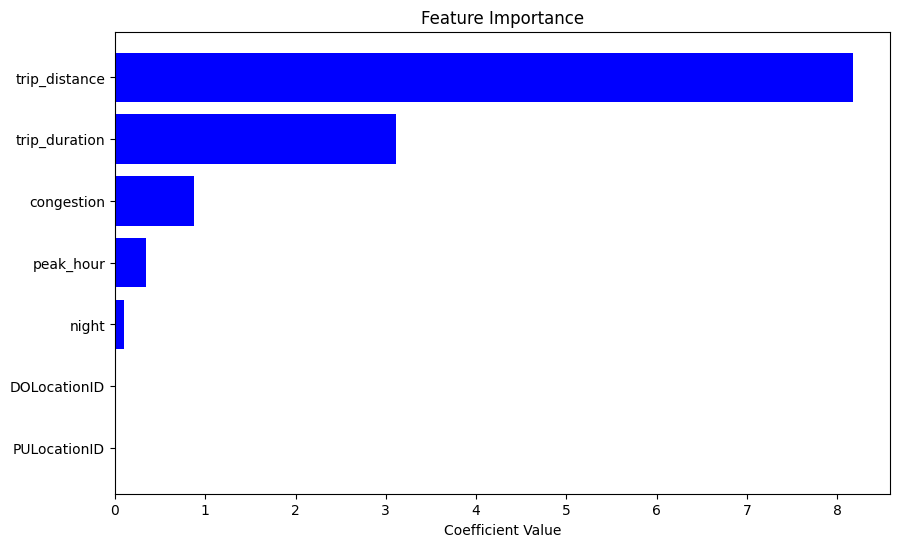

In [145]:
model.fit(X_train, y_train)
y_val_pred = model.predict(X_val)
plot_coefficients(model, feature_names=[ 'PULocationID',
            'DOLocationID',
            'trip_distance',
            'trip_duration',
            'night',
            'peak_hour',
            'congestion'])

### Evaluation

In [146]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(mean_absolute_error(y_val, y_val_pred))
print(np.sqrt(mean_squared_error(y_val, y_val_pred)))
y_val.mean()

0.834364335179777
2.4519660190282977


14.294583088990695

In [147]:
model = Ridge(alpha=1)
model.fit(X_train, y_train)
y_val_pred = model.predict(X_val)

### Another Evaluation

In [148]:
print(mean_absolute_error(y_val, y_val_pred))
print(np.sqrt(mean_squared_error(y_val, y_val_pred)))
y_val.mean()

0.8332674053903988
2.4518094999627404


14.294583088990695

### Final Evaluation

In [149]:
y_final_test_pred = model.predict(X_test)

print(mean_absolute_error(y_test, y_final_test_pred))
print(np.sqrt(mean_squared_error(y_test, y_final_test_pred)))
y_test.mean()

0.8332207481855656
2.5887597759378806


14.26793416765138

### Visualise results

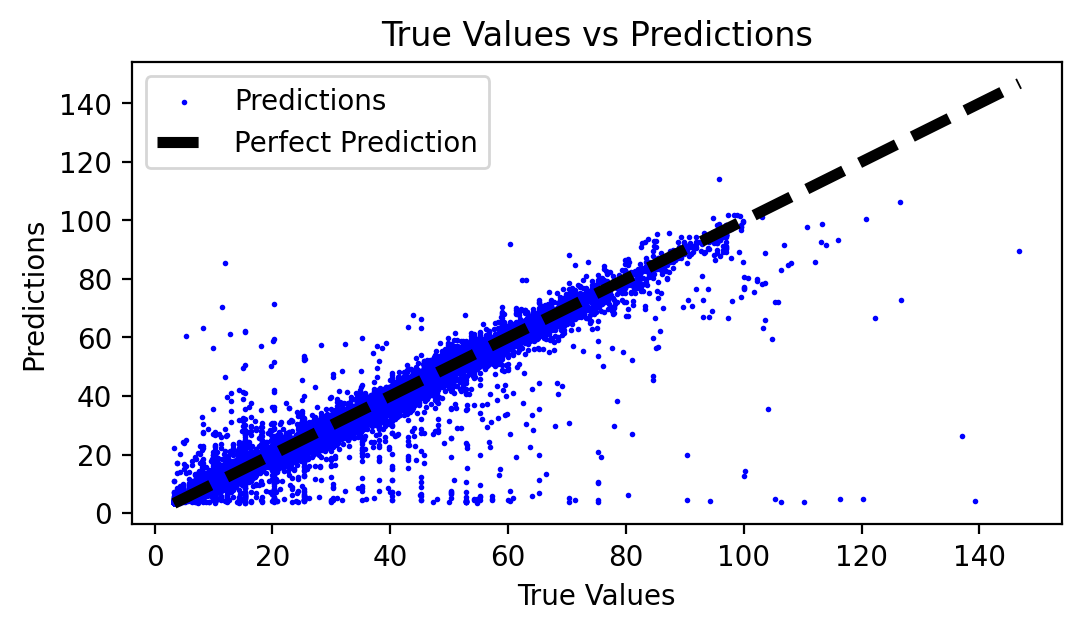

In [150]:
# Scatter Plot with Regression Line
plt.figure(figsize=(6, 3), dpi=200)
plt.scatter(y_test, y_test_pred, color='blue', label='Predictions', s=1)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=4, label='Perfect Prediction')

plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')
plt.legend()
plt.show()

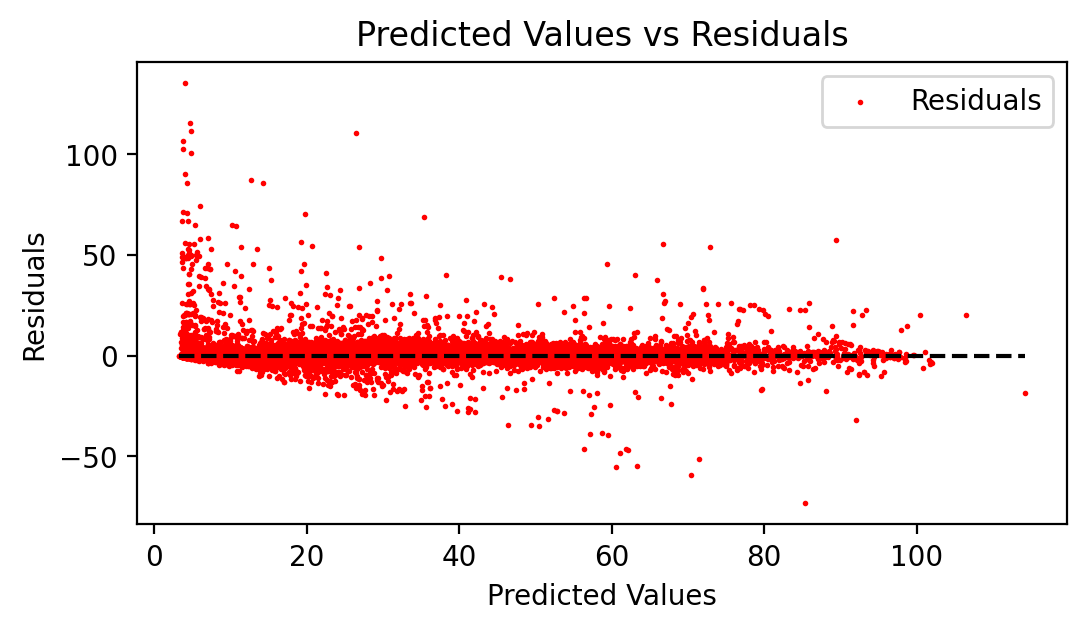

In [151]:
# Residual Plot
residuals = y_test - y_test_pred

plt.figure(figsize=(6, 3), dpi=200)
plt.scatter(y_test_pred, residuals, color='red', label='Residuals', s=1)
plt.hlines(y=0, xmin=min(y_test_pred), xmax=max(y_test_pred), colors='black', linestyles='dashed')

plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Predicted Values vs Residuals')
plt.legend()
plt.show()
